In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train[:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.isna().sum()[train.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
train['MSSubClass'] = train['MSSubClass'].apply(lambda x: str(x))[0]

In [6]:
train['LotFrontage'].fillna(0,inplace=True)
train['Alley'].fillna('NA',inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)
train['BsmtQual'].fillna('NA',inplace=True)
train['BsmtCond'].fillna('NA',inplace=True)
train['BsmtQual'].fillna('NA',inplace=True)
train['BsmtExposure'].fillna('NA',inplace=True)
train['BsmtFinType1'].fillna('NA',inplace=True)
train['BsmtFinType2'].fillna('NA',inplace=True)
train['Electrical'].fillna('NA',inplace=True)
train['FireplaceQu'].fillna('NA',inplace=True)
train['GarageType'].fillna('NA',inplace=True)
train['GarageYrBlt'].fillna(0,inplace=True)
train['GarageFinish'].fillna('NA',inplace=True)
train['GarageQual'].fillna('NA',inplace=True)
train['GarageCond'].fillna('NA',inplace=True)
train['PoolQC'].fillna('NA',inplace=True)
train['Fence'].fillna('NA',inplace=True)
train['MiscFeature'].fillna('NA',inplace=True)

# 1. Use all the features + random forest model

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

In [23]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

# 2. There are non-numerical data. Use from catboost instead

In [7]:
from catboost import CatBoostRegressor, Pool

In [8]:
X = train.drop(columns=['SalePrice','Id'])
# X = train
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)
cat_features = X_train.select_dtypes(include='object').columns.tolist()

In [9]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
valid_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [10]:
baseline_model = CatBoostRegressor(verbose=0)  # suppress training output
baseline_model.fit(train_pool)

In [11]:
preds = baseline_model.predict(valid_pool)
print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.08298106893750512


# 3. Calculate the importance of each model

In [12]:
feature_importance = pd.DataFrame({
    'Feature': baseline_model.feature_names_,
    'Importance': baseline_model.get_feature_importance()
})

In [13]:
feature_importance.sort_values('Importance',ascending=False,inplace=True)
feature_importance

,Feature,Importance
16,OverallQual,19.989453
45,GrLivArea,12.991140
60,GarageCars,5.638695
42,1stFlrSF,5.309687
37,TotalBsmtSF,5.091649
...,...,...
74,MiscVal,0.000770
8,Utilities,0.000169
47,BsmtHalfBath,0.000000
4,Street,0.000000


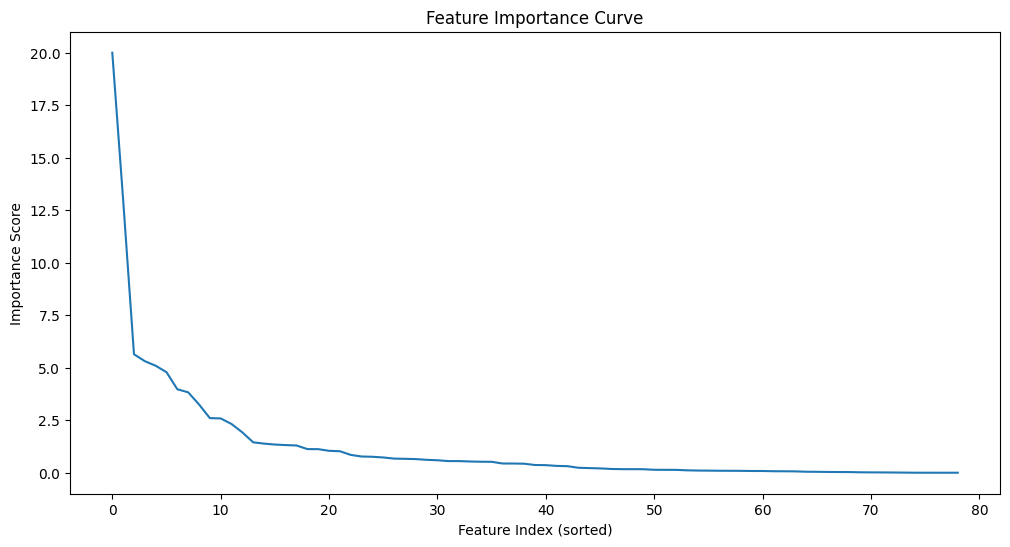

In [14]:
feat_imp_df = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(feat_imp_df['Importance'].values)
plt.xlabel("Feature Index (sorted)")
plt.ylabel("Importance Score")
plt.title("Feature Importance Curve")
plt.show()

Text(0.5, 1.0, 'Histogram of Feature Importances')

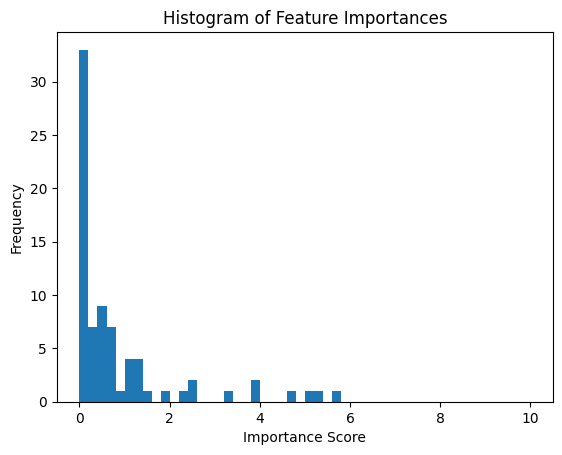

In [15]:
plt.hist(feat_imp_df['Importance'], bins=50,range = (0,10))
plt.xlabel("Importance Score")
plt.ylabel("Frequency")
plt.title("Histogram of Feature Importances")

In [62]:
# taking importance > 1.5 as an arbitrary threshold, and train the model again
useful_features = feature_importance[feature_importance['Importance']>0.5]['Feature'].to_list()


X_train_topfeature = X_train[useful_features]
# X_train_topfeature = X_train[feature_importance[:30]['Feature'].to_list()]

cat_features_topfeatures = X_train_topfeature.select_dtypes(include='object').columns.tolist()


train_pool = Pool(data=X_train_topfeature, label=y_train, cat_features=cat_features_topfeatures)
valid_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features+cat_features_featureengi)

feature_selection_model = CatBoostRegressor(verbose=0)  # suppress training output
feature_selection_model.fit(train_pool)

In [63]:
preds = feature_selection_model.predict(valid_pool)
print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.0847213189717637


# 4. Feature engineering

In [28]:
useful_features

16      OverallQual
45        GrLivArea
60       GarageCars
42         1stFlrSF
37      TotalBsmtSF
43         2ndFlrSF
33       BsmtFinSF1
52      KitchenQual
3           LotArea
29         BsmtQual
57       GarageType
11     Neighborhood
48         FullBath
53     TotRmsAbvGrd
56      FireplaceQu
17      OverallCond
18        YearBuilt
55       Fireplaces
28       Foundation
26        ExterQual
61       GarageArea
19     YearRemodAdd
1          MSZoning
31     BsmtExposure
66      OpenPorchSF
7       LandContour
46     BsmtFullBath
49         HalfBath
78    SaleCondition
77         SaleType
58      GarageYrBlt
12       Condition1
2       LotFrontage
25       MasVnrArea
6          LotShape
75           MoSold
Name: Feature, dtype: object

In [29]:
train[useful_features].loc[0]

OverallQual            7
GrLivArea           1710
GarageCars             2
1stFlrSF             856
TotalBsmtSF          856
2ndFlrSF             854
BsmtFinSF1           706
KitchenQual           Gd
LotArea             8450
BsmtQual              Gd
GarageType        Attchd
Neighborhood     CollgCr
FullBath               2
TotRmsAbvGrd           8
FireplaceQu           NA
OverallCond            5
YearBuilt           2003
Fireplaces             0
Foundation         PConc
ExterQual             Gd
GarageArea           548
YearRemodAdd        2003
MSZoning              RL
BsmtExposure          No
OpenPorchSF           61
LandContour          Lvl
BsmtFullBath           1
HalfBath               1
SaleCondition     Normal
SaleType              WD
GarageYrBlt       2003.0
Condition1          Norm
LotFrontage         65.0
MasVnrArea         196.0
LotShape             Reg
MoSold                 2
Name: 0, dtype: object

In [44]:
X_train_featureengi = X_train

In [51]:
engineered_features = [
    'TotalSF',
    'TotalBaths',
    'GarageAge',
    'GarageEfficiency',
    'HasGarage',
    'HouseAge',
    'RemodAge',
    'IsRemodeled',
    'IsNew',
    'QualGrLiv',
    'QualGarage',
    'BathsPerRoom',
    'RoomSize',
    'SeasonSold'  # if you keep this one-hot encoded
]

In [46]:
# Area-related features
X_train_featureengi['TotalSF'] = (
    X_train_featureengi['1stFlrSF'] + 
    X_train_featureengi['2ndFlrSF'] + 
    X_train_featureengi['TotalBsmtSF']
)

# Bathroom total
X_train_featureengi['TotalBaths'] = (
    X_train_featureengi['FullBath'] + 
    X_train_featureengi['HalfBath'] * 0.5 +
    X_train_featureengi.get('BsmtFullBath', 0) + 
    X_train_featureengi.get('BsmtHalfBath', 0) * 0.5
)

# Garage features
X_train_featureengi['GarageAge'] = (
    X_train_featureengi['YrSold'] - X_train_featureengi['GarageYrBlt']
)
X_train_featureengi['GarageEfficiency'] = (
    X_train_featureengi['GarageArea'] / (X_train_featureengi['GarageCars'] + 1e-5)
)
X_train_featureengi['HasGarage'] = (
    X_train_featureengi['GarageCars'] > 0
).astype(int)

# House age features
X_train_featureengi['HouseAge'] = (
    X_train_featureengi['YrSold'] - X_train_featureengi['YearBuilt']
)
X_train_featureengi['RemodAge'] = (
    X_train_featureengi['YrSold'] - X_train_featureengi['YearRemodAdd']
)
X_train_featureengi['IsRemodeled'] = (
    X_train_featureengi['YearRemodAdd'] != X_train_featureengi['YearBuilt']
).astype(int)
X_train_featureengi['IsNew'] = (
    X_train_featureengi['YrSold'] == X_train_featureengi['YearBuilt']
).astype(int)

# Interaction features
X_train_featureengi['QualGrLiv'] = (
    X_train_featureengi['OverallQual'] * X_train_featureengi['GrLivArea']
)
X_train_featureengi['QualGarage'] = (
    X_train_featureengi['GarageCars'] * X_train_featureengi['GarageArea']
)
X_train_featureengi['BathsPerRoom'] = (
    X_train_featureengi['TotalBaths'] / (X_train_featureengi['TotRmsAbvGrd'] + 1e-5)
)
X_train_featureengi['RoomSize'] = (
    X_train_featureengi['GrLivArea'] / (X_train_featureengi['TotRmsAbvGrd'] + 1e-5)
)

# Season of sale (optional categorical)
X_train_featureengi['SeasonSold'] = X_train_featureengi['MoSold'].apply(
    lambda x: 'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Fall'   if x in [9, 10, 11] else 
              'Winter'
)


In [53]:
X_train_featureengi[engineered_features+useful_features]

,TotalSF,TotalBaths,GarageAge,GarageEfficiency,HasGarage,HouseAge,RemodAge,IsRemodeled,IsNew,QualGrLiv,...,BsmtFullBath,HalfBath,SaleCondition,SaleType,GarageYrBlt,Condition1,LotFrontage,MasVnrArea,LotShape,MoSold
1003,3360,2.0,31.0,263.998680,1,31,31,0,0,8400,...,0,0,Normal,WD,1976.0,Feedr,0.0,164.0,IR1,6
959,2112,3.5,11.0,241.998790,1,11,11,0,0,9912,...,1,1,Normal,WD,1999.0,Norm,24.0,0.0,Reg,5
1016,3008,3.0,13.0,238.998805,1,13,13,0,0,10528,...,1,0,Normal,WD,1996.0,Norm,73.0,196.0,Reg,6
397,2676,2.0,45.0,263.997360,1,45,45,0,0,9060,...,0,0,Normal,WD,1962.0,PosN,69.0,288.0,Reg,7
1030,2614,2.0,2006.0,0.000000,0,90,11,1,0,9640,...,0,0,Normal,WD,0.0,Norm,0.0,0.0,Reg,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3087,3.0,14.0,287.498563,1,14,10,1,0,10074,...,1,0,Normal,WD,1994.0,Norm,65.0,258.0,Reg,10
423,4100,3.5,10.0,231.999227,1,10,10,0,0,21040,...,1,1,Normal,WD,1998.0,Norm,80.0,473.0,Reg,6
1012,2104,1.5,84.0,179.998200,1,84,11,1,0,9012,...,0,1,Normal,WD,1923.0,Norm,55.0,0.0,Reg,8
808,2110,2.0,40.0,241.998790,1,40,40,0,0,5430,...,1,0,Normal,WD,1966.0,Norm,85.0,1047.0,Reg,6


In [55]:
X_valid_featureengi = X_valid


# Area-related features
X_valid_featureengi['TotalSF'] = (
    X_valid_featureengi['1stFlrSF'] + 
    X_valid_featureengi['2ndFlrSF'] + 
    X_valid_featureengi['TotalBsmtSF']
)

# Bathroom total
X_valid_featureengi['TotalBaths'] = (
    X_valid_featureengi['FullBath'] + 
    X_valid_featureengi['HalfBath'] * 0.5 +
    X_valid_featureengi.get('BsmtFullBath', 0) + 
    X_valid_featureengi.get('BsmtHalfBath', 0) * 0.5
)

# Garage features
X_valid_featureengi['GarageAge'] = (
    X_valid_featureengi['YrSold'] - X_valid_featureengi['GarageYrBlt']
)
X_valid_featureengi['GarageEfficiency'] = (
    X_valid_featureengi['GarageArea'] / (X_valid_featureengi['GarageCars'] + 1e-5)
)
X_valid_featureengi['HasGarage'] = (
    X_valid_featureengi['GarageCars'] > 0
).astype(int)

# House age features
X_valid_featureengi['HouseAge'] = (
    X_valid_featureengi['YrSold'] - X_valid_featureengi['YearBuilt']
)
X_valid_featureengi['RemodAge'] = (
    X_valid_featureengi['YrSold'] - X_valid_featureengi['YearRemodAdd']
)
X_valid_featureengi['IsRemodeled'] = (
    X_valid_featureengi['YearRemodAdd'] != X_valid_featureengi['YearBuilt']
).astype(int)
X_valid_featureengi['IsNew'] = (
    X_valid_featureengi['YrSold'] == X_valid_featureengi['YearBuilt']
).astype(int)

# Interaction features
X_valid_featureengi['QualGrLiv'] = (
    X_valid_featureengi['OverallQual'] * X_valid_featureengi['GrLivArea']
)
X_valid_featureengi['QualGarage'] = (
    X_valid_featureengi['GarageCars'] * X_valid_featureengi['GarageArea']
)
X_valid_featureengi['BathsPerRoom'] = (
    X_valid_featureengi['TotalBaths'] / (X_valid_featureengi['TotRmsAbvGrd'] + 1e-5)
)
X_valid_featureengi['RoomSize'] = (
    X_valid_featureengi['GrLivArea'] / (X_valid_featureengi['TotRmsAbvGrd'] + 1e-5)
)

# Season of sale (optional categorical)
X_valid_featureengi['SeasonSold'] = X_valid_featureengi['MoSold'].apply(
    lambda x: 'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Fall'   if x in [9, 10, 11] else 
              'Winter'
)


In [60]:
X_train_featureengi = X_train_featureengi[engineered_features+useful_features]

cat_features_featureengi = X_train_featureengi.select_dtypes(include='object').columns.tolist()


train_pool = Pool(data=X_train_featureengi, label=y_train, cat_features=cat_features_featureengi)
valid_pool = Pool(data=X_valid_featureengi, label=y_valid, cat_features=cat_features+cat_features_featureengi)

feature_engi_model = CatBoostRegressor(verbose=0)  # suppress training output
feature_engi_model.fit(train_pool)

In [64]:
preds = feature_engi_model.predict(valid_pool)
print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.07987295118827097


In [65]:
feature_importance_engineered = pd.DataFrame({
    'Feature': feature_engi_model.feature_names_,
    'Importance': feature_engi_model.get_feature_importance()
})

In [71]:
feature_importance_engineered[feature_importance_engineered['Feature'].isin(engineered_features)]

,Feature,Importance
0,TotalSF,11.268953
1,TotalBaths,1.567436
2,GarageAge,1.288145
3,GarageEfficiency,0.651359
4,HasGarage,0.149558
5,HouseAge,2.156490
6,RemodAge,0.819394
7,IsRemodeled,0.179658
8,IsNew,0.082583
9,QualGrLiv,17.275394


In [72]:
feature_importance_engineered.sort_values('Importance',ascending=False)

,Feature,Importance
9,QualGrLiv,17.275394
0,TotalSF,11.268953
14,OverallQual,7.869867
25,Neighborhood,4.637394
20,BsmtFinSF1,4.099820
22,LotArea,3.467820
23,BsmtQual,3.415098
30,YearBuilt,3.357043
18,TotalBsmtSF,2.796295
33,ExterQual,2.442368


# 5. Do feature selection again

In [87]:
# taking importance > 1.5 as an arbitrary threshold, and train the model again
useful_features_engineered = feature_importance_engineered[feature_importance['Importance']>0.2]['Feature'].to_list()


X_train_topengfeature = X_train_featureengi[useful_features_engineered]

cat_features_topengfeatures = X_train_topengfeature.select_dtypes(include='object').columns.tolist()


train_pool = Pool(data=X_train_topengfeature, label=y_train, cat_features=cat_features_topengfeatures)
valid_pool = Pool(data=X_valid_featureengi, label=y_valid, cat_features=cat_features+cat_features_featureengi)

feature_engselection_model = CatBoostRegressor(verbose=0)  # suppress training output
feature_engselection_model.fit(train_pool)

/var/folders/tp/wcrysdjx3f97j8rv2xjxpcww0000gn/T/ipykernel_33204/401633647.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  useful_features_engineered = feature_importance_engineered[feature_importance['Importance']>0.2]['Feature'].to_list()


In [88]:
preds = feature_engselection_model.predict(valid_pool)
print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.08835847959338057


## the 50 features are all quite relevant and no need to trim further

# 6. Try XGBoost

In [91]:
from xgboost import XGBRegressor

In [94]:
# Combine training and validation for consistent encoding
full_X = pd.concat([X_train_featureengi, X_valid_featureengi])
full_X_encoded = pd.get_dummies(full_X)

# Re-split
X_train_encoded = full_X_encoded.iloc[:len(X_train_featureengi), :]
X_valid_encoded = full_X_encoded.iloc[len(X_train_featureengi):, :]

In [95]:
X_train_featureengi

,TotalSF,TotalBaths,GarageAge,GarageEfficiency,HasGarage,HouseAge,RemodAge,IsRemodeled,IsNew,QualGrLiv,...,BsmtFullBath,HalfBath,SaleCondition,SaleType,GarageYrBlt,Condition1,LotFrontage,MasVnrArea,LotShape,MoSold
1003,3360,2.0,31.0,263.998680,1,31,31,0,0,8400,...,0,0,Normal,WD,1976.0,Feedr,0.0,164.0,IR1,6
959,2112,3.5,11.0,241.998790,1,11,11,0,0,9912,...,1,1,Normal,WD,1999.0,Norm,24.0,0.0,Reg,5
1016,3008,3.0,13.0,238.998805,1,13,13,0,0,10528,...,1,0,Normal,WD,1996.0,Norm,73.0,196.0,Reg,6
397,2676,2.0,45.0,263.997360,1,45,45,0,0,9060,...,0,0,Normal,WD,1962.0,PosN,69.0,288.0,Reg,7
1030,2614,2.0,2006.0,0.000000,0,90,11,1,0,9640,...,0,0,Normal,WD,0.0,Norm,0.0,0.0,Reg,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3087,3.0,14.0,287.498563,1,14,10,1,0,10074,...,1,0,Normal,WD,1994.0,Norm,65.0,258.0,Reg,10
423,4100,3.5,10.0,231.999227,1,10,10,0,0,21040,...,1,1,Normal,WD,1998.0,Norm,80.0,473.0,Reg,6
1012,2104,1.5,84.0,179.998200,1,84,11,1,0,9012,...,0,1,Normal,WD,1923.0,Norm,55.0,0.0,Reg,8
808,2110,2.0,40.0,241.998790,1,40,40,0,0,5430,...,1,0,Normal,WD,1966.0,Norm,85.0,1047.0,Reg,6


In [109]:
XG_model = XGBRegressor()
XG_model.fit(X_train_encoded, y_train,
          # eval_set=[(X_valid_encoded, y_valid)],
          verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
preds = XG_model.predict(X_valid_encoded)
print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.09062017203152013


### XGBoost does not provide better results. Use Catboost

# 7. Tune Catboost

In [ ]:
X_train_featureengi = X_train_featureengi[engineered_features+useful_features]

cat_features_featureengi = X_train_featureengi.select_dtypes(include='object').columns.tolist()


train_pool = Pool(data=X_train_featureengi, label=y_train, cat_features=cat_features_featureengi)
valid_pool = Pool(data=X_valid_featureengi, label=y_valid, cat_features=cat_features+cat_features_featureengi)

feature_engi_model = CatBoostRegressor(verbose=0)  # suppress training output
feature_engi_model.fit(train_pool)

In [112]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [500, 1000]
}

cat_features_featureengi = X_train_featureengi.select_dtypes(include='object').columns.tolist()


cat_model = CatBoostRegressor(verbose=0)
search = RandomizedSearchCV(cat_model, params, cv=3, scoring='neg_mean_absolute_error')
search.fit(X_train_featureengi, y_train, cat_features=cat_features_featureengi)

print("Best MAE:", -search.best_score_)
print("Best params:", search.best_params_)

Best MAE: 15165.851837955872
Best params: {'learning_rate': 0.03, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 4}


In [115]:
valid_pool = Pool(data=X_valid_featureengi, label=y_valid, cat_features=cat_features+cat_features_featureengi)


best_model = search.best_estimator_
preds = best_model.predict(valid_pool)

print ("Percentage error is:", (mean_absolute_error(y_valid, preds) / y_train.mean()))

Percentage error is: 0.08201713919957804


# 8. Final submission

In [155]:
test = pd.read_csv('test.csv')

In [156]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [157]:
test['MSSubClass'] = test['MSSubClass'].apply(lambda x: str(x))[0]
test['LotFrontage'].fillna(0,inplace=True)
test['Alley'].fillna('NA',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)
test['BsmtQual'].fillna('NA',inplace=True)
test['BsmtCond'].fillna('NA',inplace=True)
test['BsmtQual'].fillna('NA',inplace=True)
test['BsmtExposure'].fillna('NA',inplace=True)
test['BsmtFinType1'].fillna('NA',inplace=True)
test['BsmtFinType2'].fillna('NA',inplace=True)
test['Electrical'].fillna('NA',inplace=True)
test['FireplaceQu'].fillna('NA',inplace=True)
test['GarageType'].fillna('NA',inplace=True)
test['GarageYrBlt'].fillna(0,inplace=True)
test['GarageFinish'].fillna('NA',inplace=True)
test['GarageQual'].fillna('NA',inplace=True)
test['GarageCond'].fillna('NA',inplace=True)
test['PoolQC'].fillna('NA',inplace=True)
test['Fence'].fillna('NA',inplace=True)
test['MiscFeature'].fillna('NA',inplace=True)

In [158]:
test.isna().sum()[test.isna().sum()>0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [159]:
test['MSZoning'].fillna('NA',inplace=True)
test['Utilities'].fillna('NA',inplace=True)
test['Exterior1st'].fillna('NA',inplace=True)
test['Exterior2nd'].fillna('NA',inplace=True)
test['BsmtFinSF1'].fillna(0,inplace=True)
test['BsmtFinSF2'].fillna(0,inplace=True)
test['BsmtUnfSF'].fillna(0,inplace=True)
test['BsmtFullBath'].fillna(0,inplace=True)
test['BsmtHalfBath'].fillna(0,inplace=True)
test['KitchenQual'].fillna('NA',inplace=True)
test['Functional'].fillna('NA',inplace=True)
test['GarageCars'].fillna(0,inplace=True)
test['GarageArea'].fillna(0,inplace=True)
test['SaleType'].fillna('Oth',inplace=True)
test['TotalBsmtSF'].fillna(0,inplace=True)



In [160]:
test_featureeng = test


# Area-related features
test_featureeng['TotalSF'] = (
    test_featureeng['1stFlrSF'] + 
    test_featureeng['2ndFlrSF'] + 
    test_featureeng['TotalBsmtSF']
)

# Bathroom total
test_featureeng['TotalBaths'] = (
    test_featureeng['FullBath'] + 
    test_featureeng['HalfBath'] * 0.5 +
    test_featureeng.get('BsmtFullBath', 0) + 
    test_featureeng.get('BsmtHalfBath', 0) * 0.5
)

# Garage features
test_featureeng['GarageAge'] = (
    test_featureeng['YrSold'] - test_featureeng['GarageYrBlt']
)
test_featureeng['GarageEfficiency'] = (
    test_featureeng['GarageArea'] / (test_featureeng['GarageCars'] + 1e-5)
)
test_featureeng['HasGarage'] = (
    test_featureeng['GarageCars'] > 0
).astype(int)

# House age features
test_featureeng['HouseAge'] = (
    test_featureeng['YrSold'] - test_featureeng['YearBuilt']
)
test_featureeng['RemodAge'] = (
    test_featureeng['YrSold'] - test_featureeng['YearRemodAdd']
)
test_featureeng['IsRemodeled'] = (
    test_featureeng['YearRemodAdd'] != test_featureeng['YearBuilt']
).astype(int)
test_featureeng['IsNew'] = (
    test_featureeng['YrSold'] == test_featureeng['YearBuilt']
).astype(int)

# Interaction features
test_featureeng['QualGrLiv'] = (
    test_featureeng['OverallQual'] * test_featureeng['GrLivArea']
)
test_featureeng['QualGarage'] = (
    test_featureeng['GarageCars'] * test_featureeng['GarageArea']
)
test_featureeng['BathsPerRoom'] = (
    test_featureeng['TotalBaths'] / (test_featureeng['TotRmsAbvGrd'] + 1e-5)
)
test_featureeng['RoomSize'] = (
    test_featureeng['GrLivArea'] / (test_featureeng['TotRmsAbvGrd'] + 1e-5)
)

# Season of sale (optional categorical)
test_featureeng['SeasonSold'] = test_featureeng['MoSold'].apply(
    lambda x: 'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Fall'   if x in [9, 10, 11] else 
              'Winter'
)


In [161]:
test_featureeng = test_featureeng[engineered_features+useful_features+['Id']]
cat_features_featureengi = test_featureeng.select_dtypes(include='object').columns.tolist()


In [163]:
test_pool = Pool(data=test_featureeng.drop('Id',axis=1), cat_features=cat_features_featureengi)
final_preds = best_model.predict(test_pool)


In [164]:
test_featureeng['SalePrice'] = final_preds

/var/folders/tp/wcrysdjx3f97j8rv2xjxpcww0000gn/T/ipykernel_33204/1409815815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_featureeng['SalePrice'] = final_preds


In [165]:
test_featureeng[['Id','SalePrice']].to_csv('FinalPred.csv',index=False)

In [166]:
test_featureeng[['Id','SalePrice']]

,Id,SalePrice
0,1461,116613.252072
1,1462,156658.855349
2,1463,186063.916302
3,1464,191054.760004
4,1465,188649.928707
...,...,...
1454,2915,92960.937839
1455,2916,83032.141678
1456,2917,166577.021291
1457,2918,125587.514586
